<a href="https://colab.research.google.com/github/sfiddes/teaching/blob/main/example_notebooks/read_and_plot_ACCESS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Intro
- A quick intro to reading netcdf files and extracting information 

## Import the packages needed

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import netCDF4
import scipy
import pandas as pd
!pip install cartopy
import cartopy.crs as ccrs
import seaborn as sns

## Load the data
- Use xarray 
- You will need to put the model data in your own directory and update the file path (`fdir`)
- If you have multiple files (eg. all the model data) in the same directory, you can use instead: 

```
fdir = '/content/drive/My Drive/Colab Notebooks/example_notebooks/data/bx400_SH_met_daily_*' 
data = xr.open_mfdataset(fdir)
```





In [2]:
# Only needed for google colab!
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fdir = '/content/drive/My Drive/Colab Notebooks/example_notebooks/data/bx400_SH_met_daily_2016-05.nc' # You will need to change this to your own directory 
data = xr.open_dataset(fdir) # Use xarray to open netcdf file 

In [4]:
fdir = '/content/drive/My Drive/Colab Notebooks/example_notebooks/data/Radiation_1605.csv' # You will need to change this to your own directory 
obs = pd.read_csv(fdir) # Use xarray to open pandas dataframe

## Explore the model data: 
- click on the Data variables, then click the the two icons on the right hand side to view the attributes and the data report
- Do the same for the Coordinates

In [5]:
data # print out the data information 

<xarray.Dataset>
Dimensions:        (lat: 73, lat_v: 74, lon: 192, lon_u: 192, time: 31)
Coordinates:
  * lat            (lat) float64 -89.38 -88.12 -86.88 ... -1.875 -0.625 0.625
  * lat_v          (lat_v) float64 -90.0 -88.75 -87.5 -86.25 ... -1.25 0.0 1.25
  * lon_u          (lon_u) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * lon            (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * time           (time) datetime64[ns] 2016-05-01T12:00:00 ... 2016-05-31T1...
Data variables: (12/37)
    bldepth        (time, lat, lon) float32 ...
    orog           (time, lat, lon) float32 ...
    ps             (time, lat, lon) float32 ...
    rsdt           (time, lat, lon) float32 ...
    rsut           (time, lat, lon) float32 ...
    rsutcs         (time, lat, lon) float32 ...
    ...             ...
    tas_max        (time, lat, lon) float32 ...
    huss           (time, lat, lon) float32 ...
    hfls           (time, lat, lon) float32 ...
    hfss           (time, lat, lon) float32 ...
    field3230      (time, lat, lon) float32 ...
    field3230_max  (time, lat, lon) float32 ...

In [6]:
# Isolate a single variable 
data.rsds # Can also use data['rsds']

<xarray.DataArray 'rsds' (time: 31, lat: 73, lon: 192)>
[434496 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... -1.875 -0.625 0.625
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * time     (time) datetime64[ns] 2016-05-01T12:00:00 ... 2016-05-31T12:00:00
Attributes:
    stash_item:     235
    long_name:      TOTAL DOWNWARD SURFACE SW FLUX
    cell_methods:   time0: mean
    units:          W m-2
    stash_section:  1
    name:           rsds
    standard_name:  surface_downwelling_shortwave_flux_in_air

## Do some math: 
https://xarray.pydata.org/en/v0.10.4/computation.html
- Different arithmatic
- Different dimensions 

In [7]:
data.rsds.mean() # Will produce the mean over the enitre data set. Try also .min() or .sum() 

<xarray.DataArray 'rsds' ()>
array(86.084526, dtype=float32)

In [8]:
data.rsds.mean('time') # Can choose a dimenstion to average over (try also lat or lon)

<xarray.DataArray 'rsds' (lat: 73, lon: 192)>
array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [238.5695 , 236.30098, 234.01671, ..., 245.1986 , 241.22101,
        241.73538],
       [236.75377, 231.56592, 228.78963, ..., 242.73813, 238.40509,
        235.00842],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... -1.875 -0.625 0.625
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

## Plot the data
- Map 
- Time series 
- https://xarray.pydata.org/en/v0.10.4/plotting.html

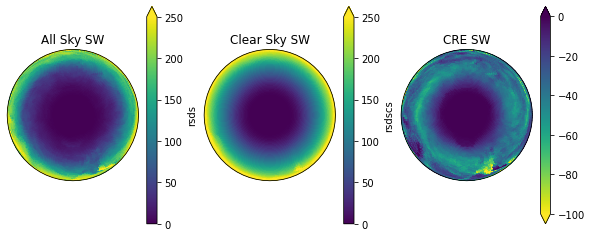

In [9]:
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(131, projection=ccrs.Orthographic(140, -90))
#ax.coastlines(); Add coaslines, this crashes the plot - a problem with colab, switch it on when you run locally. 
cm =  data.rsds.mean('time').plot(
    transform=ccrs.PlateCarree(),
    vmin=0,vmax=250,
    cmap='viridis',
    );
plt.title('All Sky SW');

ax = plt.subplot(132, projection=ccrs.Orthographic(140, -90))
#ax.coastlines();
cm =  data.rsdscs.mean('time').plot(
    transform=ccrs.PlateCarree(),
    vmin=0,vmax=250,
    cmap='viridis',
    );
plt.title('Clear Sky SW');

ax = plt.subplot(133, projection=ccrs.Orthographic(140, -90))
#ax.coastlines();
cm =  (data.rsds - data.rsdscs).mean('time').plot(
    transform=ccrs.PlateCarree(),
    vmin=-100,vmax=0,
    cmap='viridis_r',
    );
plt.title('CRE SW');

- There are neater mapping fuctions (cartopy), but they don't work very well with google collab

---

- To make a time-series, we will choose just one point by using the interpolation function: http://xarray.pydata.org/en/stable/user-guide/interpolation.html
- See also https://xarray.pydata.org/en/v0.10.4/indexing.html# (if you want to select one time eg.) 

In [10]:
data1D = data.interp(lat=-54.6208, lon=158.8556, lat_v=-54.6208, lon_u=158.8556) # have to do it for both lat/lon dimensions.. 
data1D

<xarray.Dataset>
Dimensions:        (time: 31)
Coordinates:
  * time           (time) datetime64[ns] 2016-05-01T12:00:00 ... 2016-05-31T1...
    lat            float64 -54.62
    lon            float64 158.9
    lat_v          float64 -54.62
    lon_u          float64 158.9
Data variables: (12/37)
    bldepth        (time) float64 197.7 188.3 36.67 36.67 ... 478.2 947.6 237.0
    orog           (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ps             (time) float64 9.946e+04 9.839e+04 ... 1.016e+05 1.017e+05
    rsdt           (time) float64 111.5 109.1 106.7 104.4 ... 63.39 62.4 61.45
    rsut           (time) float64 73.38 73.71 60.99 49.74 ... 24.31 33.99 32.2
    rsutcs         (time) float64 24.8 24.09 26.46 25.15 ... 16.76 17.36 16.39
    ...             ...
    tas_max        (time) float64 281.0 280.3 281.0 280.3 ... 278.9 277.6 279.2
    huss           (time) float64 0.005396 0.00526 ... 0.003592 0.004854
    hfls           (time) float64 -0.339 15.9 -22.54 27.65 ... 48.24 93.92 28.48
    hfss           (time) float64 -9.382 3.243 -27.51 ... 10.64 29.55 0.8389
    field3230      (time) float64 8.311 10.38 10.13 9.946 ... 10.48 11.9 12.52
    field3230_max  (time) float64 12.71 13.84 13.4 16.52 ... 12.89 13.25 13.91

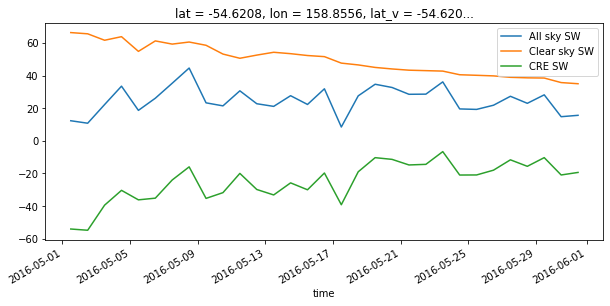

In [11]:
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111,)

data1D.rsds.plot(label='All sky SW'); 
data1D.rsdscs.plot(label='Clear sky SW'); 
(data1D.rsds-data1D.rsdscs).plot(label='CRE SW'); 
plt.legend();

# Save the data
- Often with model data it is best to extract the data you need just once and save it, rather than opening the netcdf files everytime

- If the data you want is 2D+ save as another (smaller) netcdf file. 
- If the data is say just a time series, convert to a csv using Pandas
https://pandas.pydata.org/docs/reference/frame.html

In [12]:
data.rsds.mean('time').to_netcdf('/content/drive/My Drive/Colab Notebooks/example_notebooks/data/example_netcdf.nc') # Write xarray dataarray to netcdf

In [13]:
df = data1D.to_pandas() # Convert to a pandas dataframe
df.head() # also try .tail() to print out just the start or end of dataframe

,bldepth,orog,ps,rsdt,rsut,rsutcs,rsdscs,rsuscs,rsds,rlut,rlutcs,rlds,rldscs,field4203,field4204,field5205,field5206,prrn,prsn,pr,field9203,field9204,field9205,psl,lwp,clivi,field30461,uas,vas,tas,tas_min,tas_max,huss,hfls,hfss,field3230,field3230_max,lat,lon,lat_v,lon_u
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-01 12:00:00,197.683562,0.0,99463.612003,111.465607,73.384738,24.795428,66.371879,8.998027,12.322668,192.470927,235.864103,328.368898,269.476618,0.000058,0.0,0.000023,0.000000e+00,0.000081,0.000000e+00,0.000081,0.926919,0.380509,0.684003,99460.998127,0.099531,0.202574,18.743783,1.443600,-1.158853,279.028551,277.379845,281.016018,0.005396,-0.338971,-9.382310,8.310688,12.710561,-54.6208,158.8556,-54.6208,158.8556
2016-05-02 12:00:00,188.294145,0.0,98390.703672,109.070152,73.713343,24.088321,65.621754,8.993618,10.808025,169.731402,233.722453,324.099157,266.670054,0.000174,0.0,0.000032,0.000000e+00,0.000206,0.000000e+00,0.000206,0.849990,0.673754,0.749859,98388.177041,0.181054,0.484429,19.442495,0.595858,1.653119,278.357535,277.252880,280.253426,0.005260,15.903013,3.242637,10.384328,13.838641,-54.6208,158.8556,-54.6208,158.8556
2016-05-03 12:00:00,36.666672,0.0,98349.723570,106.724451,60.994116,26.464016,61.669610,8.179255,22.243654,184.354748,234.370651,339.822107,274.258483,0.000053,0.0,0.000011,0.000000e+00,0.000064,0.000000e+00,0.000064,0.956695,0.720706,0.806252,98349.146324,0.078267,0.187996,16.869416,2.066461,-9.283857,280.075395,279.048031,280.991735,0.006091,-22.541763,-27.510888,10.128711,13.402313,-54.6208,158.8556,-54.6208,158.8556
2016-05-04 12:00:00,36.666672,0.0,99227.763339,104.428719,49.742705,25.146928,63.862479,8.815199,33.517050,207.441015,235.040962,308.294575,251.919985,0.000049,0.0,0.000006,1.216950e-07,0.000055,1.216950e-07,0.000055,0.797037,0.440283,0.392003,99229.254742,0.074811,0.180551,10.466972,5.239537,-7.345549,279.315627,279.016489,280.293266,0.004846,27.645101,-12.962353,9.945657,16.518751,-54.6208,158.8556,-54.6208,158.8556
2016-05-05 12:00:00,45.992922,0.0,99080.952374,102.183122,60.515334,30.222986,54.854161,7.753537,18.684188,199.081727,237.138411,328.378541,266.188046,0.000097,0.0,0.000008,0.000000e+00,0.000105,0.000000e+00,0.000105,0.867298,0.538262,0.493197,99080.480398,0.106324,0.294295,13.448007,7.480540,-6.281537,279.728924,278.381187,281.631692,0.005235,19.107055,-25.305526,11.071885,20.176640,-54.6208,158.8556,-54.6208,158.8556


In [14]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/example_notebooks/data/example_csv.nc')

# Explore the obseved data 
- First get it in a useable format:
  - date time index
  - daily means 

In [15]:
obs.index = pd.DatetimeIndex(obs['DateTimeUT_1605']) # Convert index to a datetime index. 
#We aren't worrying about the hours/mins/seconds here because in the next step we will create daily means 
daily_obs = obs.resample('D').mean() #'resample' to create daily means.
daily_obs = daily_obs.drop(columns=['DoM_1605','DoY_1605']) # drop the time columns we dont need any more

## Expolore data: 

In [16]:
daily_obs.head()

,Pyranometer_Avg_1605,Pyrgeometer_Avg_1605
DateTimeUT_1605,,
2016-05-01,8.162118,330.294762
2016-05-02,7.174219,341.775997
2016-05-03,15.107671,319.120673
2016-05-04,44.865405,268.783984
2016-05-05,30.284793,328.454034


## Plot data

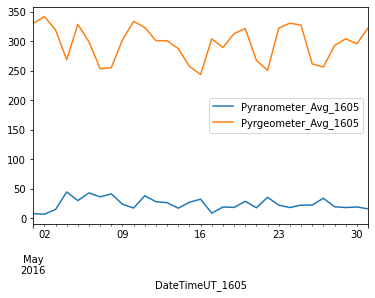

In [17]:
daily_obs.plot();

# Now try to compare model vs obs:
- Time series 
- Distribution plots 

You could also try: 
- Scatter plots 
- Calc the mean, median and standard deviation of each
- Calc the correlation values 

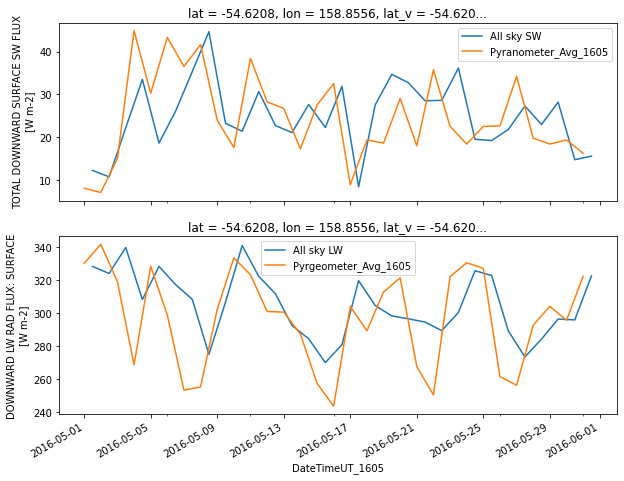

In [18]:
fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(211,)
data1D.rsds.plot(label='All sky SW'); 
daily_obs.Pyranometer_Avg_1605.plot();
plt.legend();

ax2 = plt.subplot(212,sharex=ax1)
data1D.rlds.plot(label='All sky LW'); 
daily_obs.Pyrgeometer_Avg_1605.plot();
plt.legend();


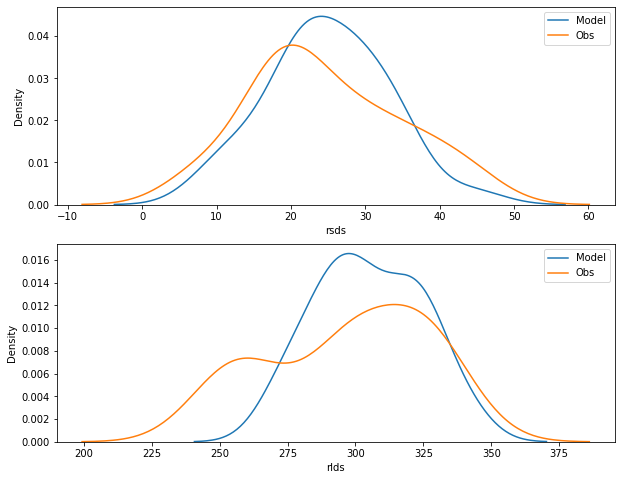

In [19]:
fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(211,)

sns.kdeplot(x=data1D.rsds,label='Model') 
sns.kdeplot(x=daily_obs.Pyranometer_Avg_1605,label='Obs');
plt.legend()

ax1 = plt.subplot(212,)
sns.kdeplot(x=data1D.rlds,label='Model') 
sns.kdeplot(x=daily_obs.Pyrgeometer_Avg_1605,label='Obs');
plt.legend();

